Assignment Done by :- **Dev Mulchandani**

In [1]:
# Run this once per session *before* importing PyCaret (safe to skip if you never saw CUDA errors)
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # hide GPUs so optional GPU backends are skipped
!pip -q uninstall -y cuml cudf cuml-cu12 cudf-cu12 cupy-cuda12x cupy-cuda11x cupy || true


In [2]:
%pip -q install mlxtend>=0.23.0
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import glob


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
csvs = sorted(glob.glob("/kaggle/input/**/*.csv", recursive=True))
if not csvs:
    raise SystemExit("❌ No CSVs found. Click **Add Data** in Kaggle and attach a dataset.")

print("Available CSVs:")
for i,p in enumerate(csvs):
    print(f"{i}: {p}")

idx = int(input("\nEnter the index of the CSV to load: "))
path = csvs[idx]
print("✅ Using:", path)

data = pd.read_csv(path)
print("Shape:", data.shape)
display(data.head())


Available CSVs:
0: /kaggle/input/bread-basket-dataset/bread basket.csv



Enter the index of the CSV to load:  0


✅ Using: /kaggle/input/bread-basket-dataset/bread basket.csv
Shape: (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
# Create the basket matrix: each transaction vs each item
basket = (data
          .groupby(['Transaction', 'Item'])['Item']
          .count()
          .unstack(fill_value=0))

# Convert counts to True/False (required for Apriori)
basket = (basket > 0)
print("✅ Basket shape:", basket.shape)
basket.head()


✅ Basket shape: (9465, 94)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Frequent itemsets
freq = apriori(basket, min_support=0.02, use_colnames=True)
print("Frequent itemsets:", freq.shape)
display(freq.sort_values("support", ascending=False).head(10))

# Association rules
rules = association_rules(freq, metric="lift", min_threshold=1.0)
print("Rules found:", rules.shape)
display(rules.sort_values("lift", ascending=False).head(10))



Frequent itemsets: (33, 2)


,support,itemsets
4,0.478394,(Coffee)
1,0.327205,(Bread)
16,0.142631,(Tea)
3,0.103856,(Cake)
20,0.090016,"(Coffee, Bread)"
11,0.086107,(Pastry)
12,0.071844,(Sandwich)
9,0.061807,(Medialuna)
7,0.058320,(Hot chocolate)
23,0.054728,"(Coffee, Cake)"


Rules found: (20, 14)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
19,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,1.0,0.007593,1.016699,0.615122,0.048464,0.016424,0.376936
18,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
13,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
12,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,1.0,0.005614,1.012667,0.305936,0.069665,0.012509,0.321387
15,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
14,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,1.0,0.006351,1.014740,0.256084,0.091968,0.014526,0.325764
11,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,1.0,0.002154,1.004705,0.200428,0.041507,0.004683,0.288656
10,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656


In [6]:
# Keep only strong rules (lift ≥ 1.2, confidence ≥ 0.5)
strong = rules[(rules['lift'] >= 1.2) & (rules['confidence'] >= 0.5)]
print("Strong rules:", strong.shape)
strong.to_csv("breadbasket_rules.csv", index=False)
print("✅ Saved breadbasket_rules.csv in /kaggle/working")
strong.head()


Strong rules: (1, 14)
✅ Saved breadbasket_rules.csv in /kaggle/working


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
18,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936


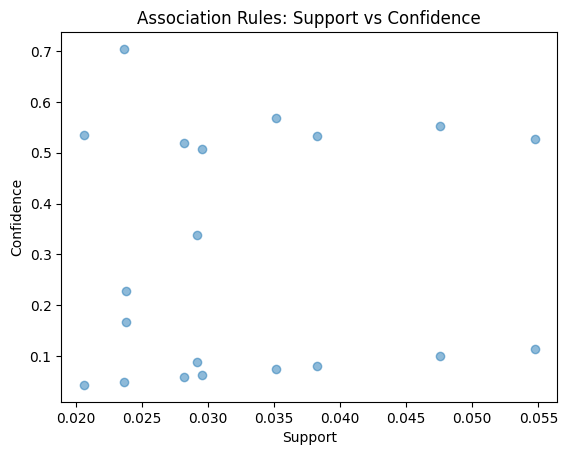

In [7]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()
